# What is the True Normal Human Body Temperature?
Background
The mean normal body temperature was held to be 37C or 98.6F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

Answer the following questions in this notebook.

1. Is the distribution of body temperatures normal?
    Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population     may also be normally distributed if we assume that this sample is representative of the population.

2. Is the sample size large? Are the observations independent?
    Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

3. Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why?
    Draw a small sample of size 10 from the data and repeat both tests.
    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic?

4. At what temperature should we consider someone's temperature to be "abnormal"?
    Start by computing the margin of error and confidence interval.

5. Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
    Write a story with your conclusion in the context of the original problem.

In [59]:
#import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats
import seaborn as sns
import math

df = pd.read_csv('Downloads/1509032434_human_temp/human_temp/data/human_body_temperature.csv')

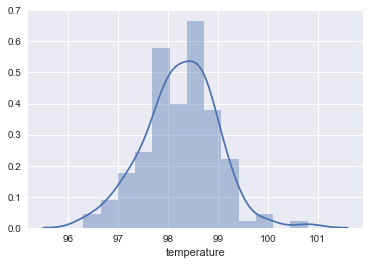

In [9]:
#since the first question asks about the distribution of body temp, we'll start with a distplot
sns.distplot(df.temperature)
plt.show()

1.This sample of the population shows a very clear normal distribution, with most of the population falling between 97F-99F. Wunderlich's estimate was 98.6F, so we can say his estimate was at least pretty close.

In [11]:
df.temperature.count()

130

2.With only 130 entries, this is not a large set by any means. However, for this exercise, it'll do
Each observation is independent because the temperature of one person doesn't allude to the temperature of another person. 

In [43]:
#since we'll be asked about the differences between male and female temps down the road, we'll separate them now
M = df[df['gender'] == 'M'].temperature
F = df[df['gender'] == 'F'].temperature

In [48]:
print(M.mean(), M.std())

98.1046153846154 0.6987557623265908


In [49]:
print(F.mean(), F.std())

98.39384615384613 0.7434877527313664


In [50]:
Sample_mean = np.mean(df.temperature)
Sample_dev = np.std(df.temperature)

print("Sample mean and dev:", [Sample_mean, Sample_dev])

Z = (M.mean()+F.mean())/2
print("Mean between male and female: ", Z)

Sample mean and dev: [98.24923076923078, 0.730357778905038]
Mean between male and female:  98.24923076923076


3a.It seems that for this sample set, the population mean body temperature is roughly 98.25F, lower than what Wunderlich estimated.
3b.Because we're only measuring the temperature variable, we can use a one-sample test for this set.
3c.And since the sample size is >30 the sample distribution can be assumed to be normal and hence we can use the z statistic instead of a t statistic.

In [62]:
def mean_confidence_interval(data, confidence=0.95):     
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [39]:
conf_int = mean_confidence_interval(df.temperature, .95)
conf_int

(98.249230769230763, 98.122002905608028, 98.376458632853499)

4.Using a 95% confidence interval, we can consider a person's temperature abnormal if it's above 98.37F or below 98.12F

In [54]:
# we've already calculated the means of both the men and women
print('Male Mean:', M.mean())
print('Female Mean:', F.mean())

Male Mean: 98.1046153846154
Female Mean: 98.39384615384613


In [56]:
#the difference in the means is
sample_diff = M.mean() - F.mean()
print(sample_diff)

-0.289230769230727


In [60]:
# the standard error of sample_diff is
standard_deviation_diff = math.sqrt((math.pow(M.std(), 2)/ M.size) + (math.pow(F.std(), 2)/ F.size))
print(standard_deviation_diff)

0.12655395041982642


For question 5, I assumed that the hypothesis was that there is zero difference between the male and female population, meaning sample_diff would be zero. And then by using the standard deviation of both sets, I can find the standard error of sample_diff, and then use both sample_diff and standard_deviation_diff to find the probability of getting a difference of .289F. 

In [63]:
stats.norm(0,1).cdf(sample_diff/standard_deviation_diff) * 100

1.114368038033863

5.A 1.114% chance indicates that, on average, there is a difference between the male and female body temperature. 


Assuming that this dataset is representative of the global population, we can conclude that:
    1. the distribution of body temperature is normal
    2. we can say with 95% confidence that the real mean population temperature is between 98.37 and 98.12, and anything beyond that range can be considered to be abnormal
    3. On average, the male body temperature is lower than females. This could be due to the male's homeostasis requirements. For example, sperm is very heat sensitive, and exposure to too much heat has been shown to cause male infertility.
    